# ДЗ №12 PCA
Добавлено: 06.11.2021 15:08
Сдать до 17 января 14:00

Для датасета из домашнего задания номер 9 (есть ли у человека диабет по предоставленным данным) исследовать связь качества классификации и количества признаков. Для этого использовать алгоритм понижения размерности PCA.

* Препроцессинг данных и базовую модель можно взять из ДЗ 9
* Построить PCA для размерности N
* Исследовать explained_variance_ratio_ для такого разложения
* Построить график изменения variance
* Определить отрезок с наиболее высоким значением вариантивности (90-99%)
* Построить ту же модель из ДЗ 9 для различного количества компонент из выбранного промежутка
* Оценить точность такой модели
* Сделать выводы о том как меняется точность модели с изменением кол-ва главных компонент
* Визуализировать данные с помощью PCA n_components=2
* Построить матрицу корреляций для данных после PCA. Что можно о ней сказать?

Optional:

* Использовать tSNE для понижения размерности c различными параметрами и повторить пункты 6-9, сравнив размерность

pima-indians-diabetes.csv

# Import section

In [1]:
# Base library
import numpy as np                                        # Linear algebra
import pandas as pd                                       # Data processing

# Visualization library
import matplotlib.pyplot as plt                           # Plotting library 
import seaborn as sns                                     # Data visualization

# Displays output inline
%matplotlib inline     

In [2]:
# Machine learning library
from sklearn.linear_model import LogisticRegression       # Class implements regularized logistic regression
from sklearn.neighbors import KNeighborsClassifier        # KNN Classifier

from sklearn.model_selection import train_test_split      # Split arrays
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.decomposition import PCA

# Data section

<h3 align=<'center'>Сахарные диабет 1-го и 2-го типа</h3>
<img src='brochure.jpg'  width=800 height=640 ></img>

Сахарный диабет — группа эндокринных заболеваний, связанных с нарушением усвоения глюкозы и развивающихся вследствие абсолютной или относительной недостаточности гормона инсулина, в результате чего развивается гипергликемия — стойкое увеличение содержания глюкозы в крови. Заболевание характеризуется хроническим течением, а также нарушением всех видов обмена веществ: углеводного, жирового, белкового, минерального и водно-солевого.

https://ru.wikipedia.org/wiki/Сахарный_диабет

Pima Indians Diabetes dataset - Attribute Information:

1. Pregnancies - количество беременностей.

2. Glucose - результат орального теста на толерантность к глюкозе:

*  лабораторный тест, позволяющий проверить, как организм переносит сахар из крови в ткани тела.

3. BloodPressure - диастолическое артериальное давление (мм.рт.ст.):

* Норма < 80 
* Гипертония 1 стадия  = (80 - 89) 
* Гипертония 2 стадия  > (90 - 120) 
* Гипертонический криз > (120 и выше)

4. SkinThickness - толщина кожной складки трицепса в (мм), для прогноза общего количества жира в организме:

* Мужчины - 2.5мм / 20% жира 
* Женщины - 18.0мм / 30% жира

5. Insulin - инсулин.

6. BMI - индекс массы тела, метод оценки избыточного или недостаточного веса (BMI = weight(kg)/[height(m)]²), categories:

* Underweight = <18.5
* Normal weight = 18.5–24.9
* Overweight = 25–29.9
* Obesity = BMI of 30 or greater

7. DiabetesPedigreeFunction - функция родословной диабета:

* истории сахарного диабета у родственников и генетическом родстве этих родственников с пациентом.

8. Age - возраст (лет).

10. Class - target:

* 0 - если не диабетик  
* 1 - если диабетик

## Load the data

In [3]:
# Read pima-indians-diabetes.csv file as a DataFrame called diabetes.
diabetes = pd.read_csv("pima-indians-diabetes.csv")

## Exploratory data analysis and visualization

In [4]:
# Preview the data
# Title DataFrame diabetes (return the first `n` rows) 
diabetes.head(n=3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
# Tail DataFrame diabetes (return the last `n` rows)
diabetes.tail(n=3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Print a concise summary of a DataFrame.
print(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
# Column names
print(f"Column names: \n{diabetes.columns}")

Column names: 
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')


In [8]:
# Data dimensionality
print(f"Shape: \n{diabetes.shape}")

Shape: 
(768, 9)


In [9]:
# Data types for each attribute
print(f"Data types: \n{diabetes.dtypes}")

Data types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object


In [10]:
# Detect missing values.
print(f"Missing values by attribute: \n{diabetes.isnull().sum()}")

Missing values by attribute: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64


In [11]:
# Descriptive Statistics:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


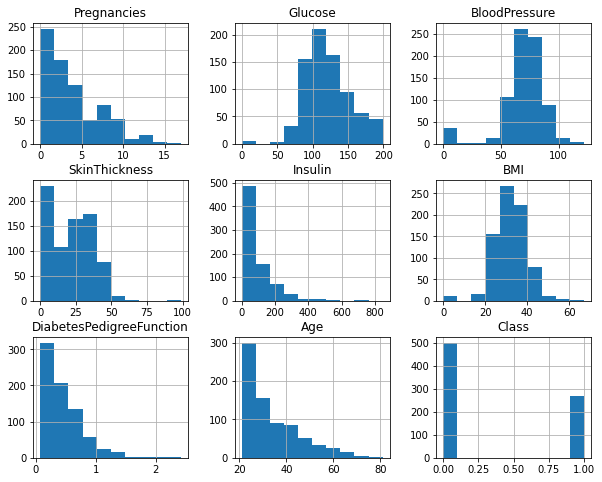

In [12]:
# Dataframe visualization
# Построим дополнительно -histogram, -pairplot для лучшего понимания структуры данных (как между собой разделяются классы). 
 
# Plot histogram
diabetes.hist(figsize=(10,8));

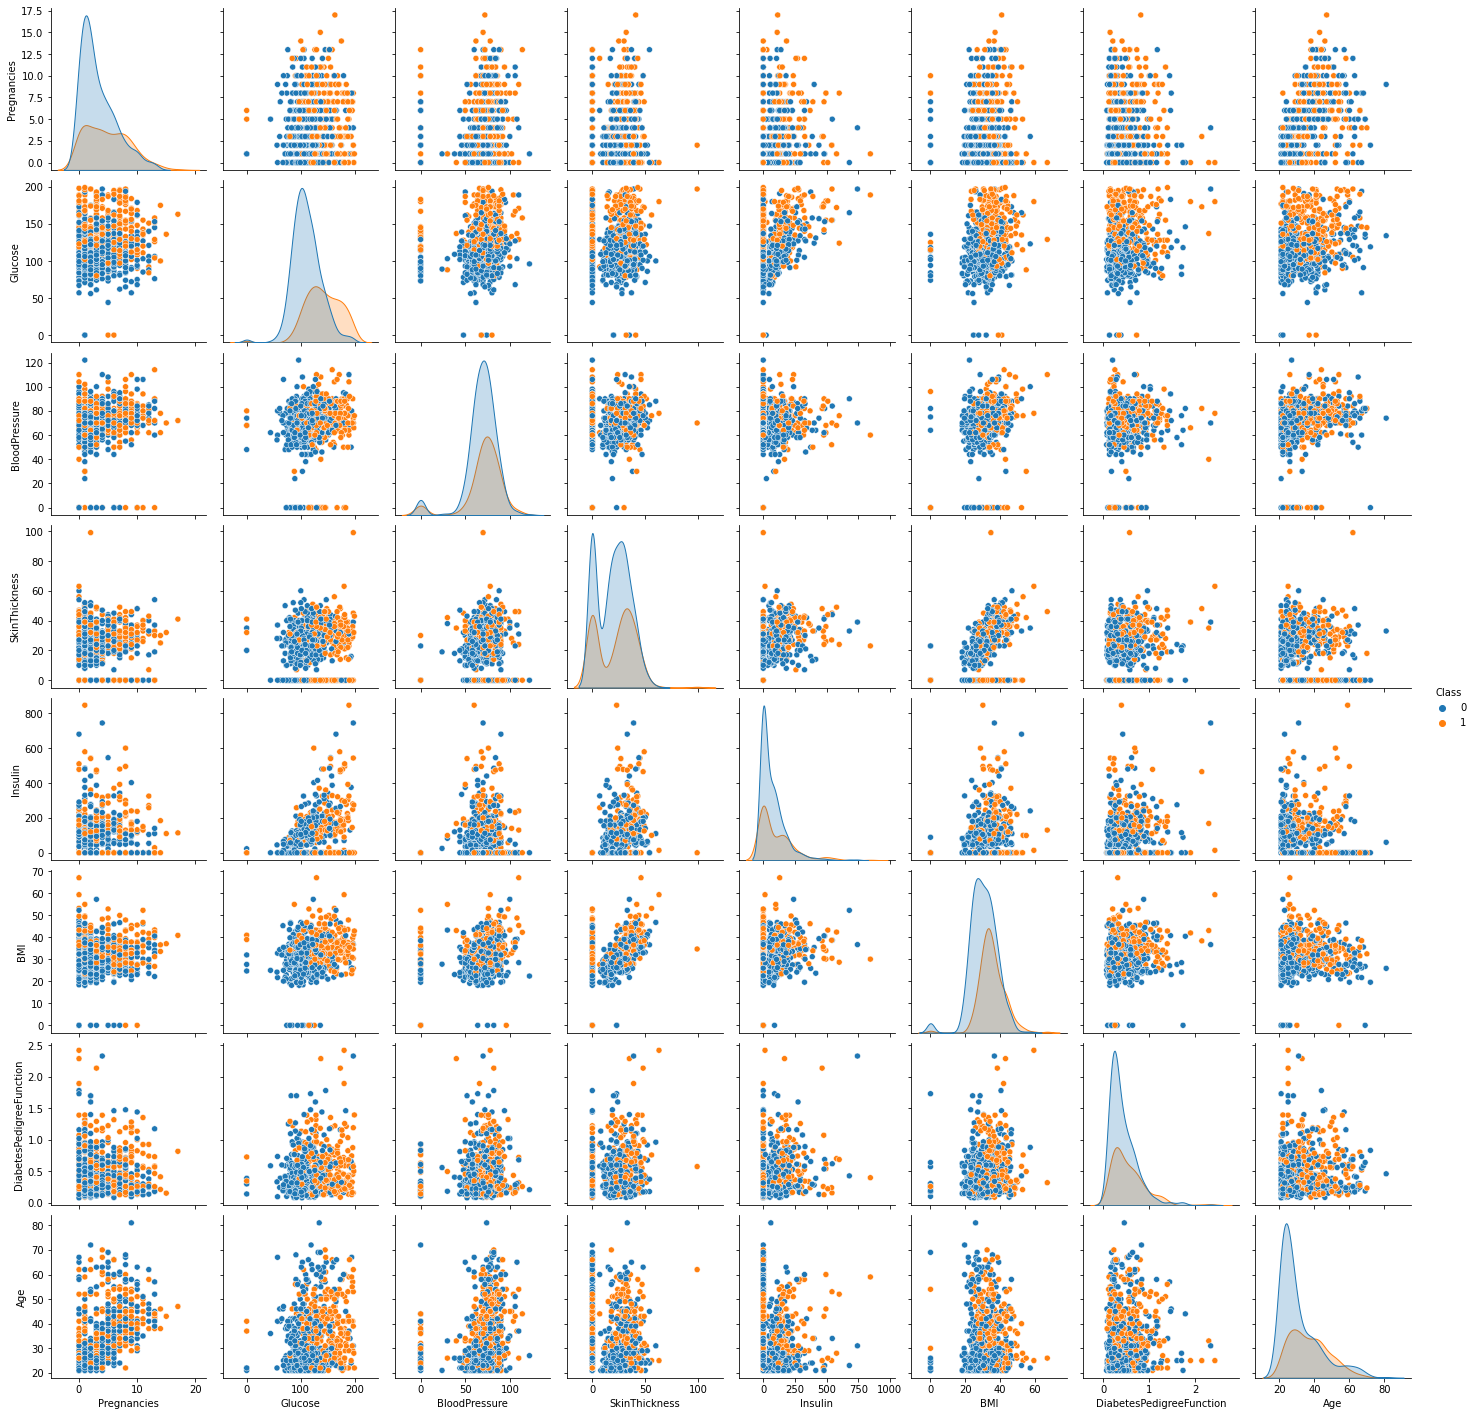

In [13]:
# Plot pairwise relationships in a dataset.
sns.pairplot(data=diabetes, hue='Class');

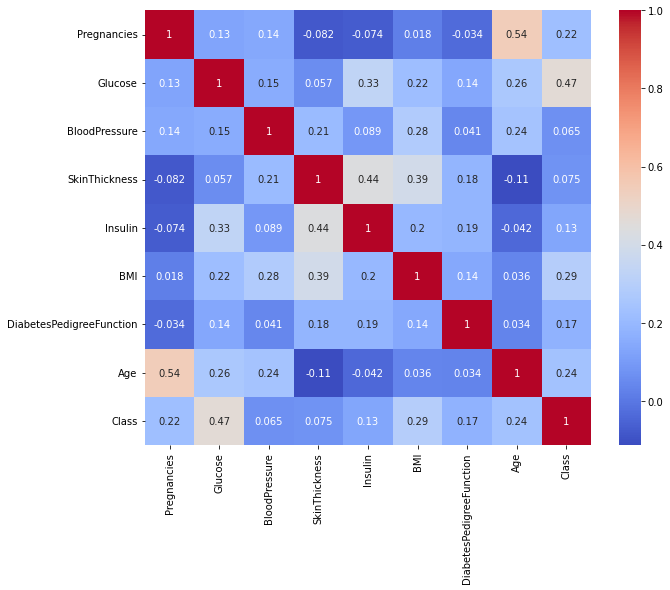

In [14]:
# Построим матрицу корреляции между признаками на исходных данных:

# Весь набор данных
plt.figure(figsize=(10,8))
#diabetes.corr()
sns.heatmap(diabetes.corr(),annot=True, cmap="coolwarm");

0    500
1    268
Name: Class, dtype: int64 



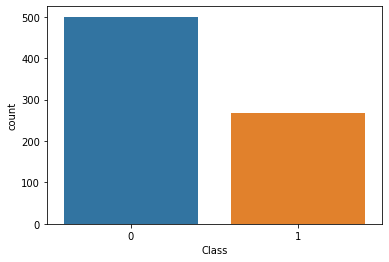

In [15]:
# Рассмотрим целевую/target переменную - 'Class'.
# Для проверки численности/балансировки классов используем функции:
#    value_counts() - для числового представления, 
#    countplot()    - для графического представления.

# Distribution of data by class, text
print(diabetes['Class'].value_counts(), '\n')

# Distribution of data by class, graphic
sns.countplot(data=diabetes, x='Class');

Summary of dataset:

* общее количество колонок - 9 (8 атрибутов и одна целевая переменная)
* количество сэмплов/строк – 768
* пропущенных значении - 0
* все признаки - являются числовыми значениями
* целевая переменная - 'Class' содержит два класса: class 0 - если не диабетик 500/65% и class 1 - если диабетик 268/35% (Присутствует дисбаланс классов.)
* имеются нулевые значения в атрибутах -Glucose -BloodPressure -SkinThickness -Insulin –BMI.

In [16]:
## Zero values, search and fill

# Как видно из Descriptive Statistics и -pairplot атрибуты -Glucose -BloodPressure -SkinThickness -Insulin -BMI, 
# имеют нулевые значения, означает что были ошибки в показаниях или значения отсутствовали и заполнили нулями. 

# Glucose, zero values:
print("Glucose, zero values       : ", len(diabetes[diabetes["Glucose"]==0]))

# BloodPressure, zero values:
print("BloodPressure, zero values : ", len(diabetes[diabetes["BloodPressure"]==0]))

# SkinThickness, zero values:
print("SkinThickness, zero values : ", len(diabetes[diabetes["SkinThickness"]==0]))

# Insulin, zero values:
print("Insulin, zero values       : ", len(diabetes[diabetes["Insulin"]==0]))

# BMI, zero values:
print("BMI, zero values           : ", len(diabetes[diabetes["BMI"]==0]))

Glucose, zero values       :  5
BloodPressure, zero values :  35
SkinThickness, zero values :  227
Insulin, zero values       :  374
BMI, zero values           :  11


Note: Количество нулевых значений по атрибутам: 5-Glucose / 35-BloodPressure / 227-SkinThickness / 374-Insulin / 11-BMI

Возможные стратегии:

* заполнинить средним по атрибуту
* заполнить медианой
* заполнить медианой или средним в зависимости от распределения
* удалить данные с нулевыми значениями
* использовать заполнители из sklearn

Используем два первых варианта для сравнения. В качестве основного в работе выберем медиану, т.к. некоторые атрибуты (227-SkinThickness / 374-Insulin) не имеют нормального распределения и имеют найбольшее количество нулевых значении.

In [17]:
# Заполним нулевые значения Glucose/BloodPressure/SkinThickness/Insulin/BMI медианой -median() по атрибуту.
# Для mean() только результаты ниже в сравнении

diabetes['Glucose'].replace(0,diabetes['Glucose'].median(axis=0),inplace=True)
diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].median(axis=0),inplace=True)
diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].median(axis=0),inplace=True)
diabetes['Insulin'].replace(0,diabetes['Insulin'].median(axis=0),inplace=True)
diabetes['BMI'].replace(0,diabetes['BMI'].median(axis=0),inplace=True)

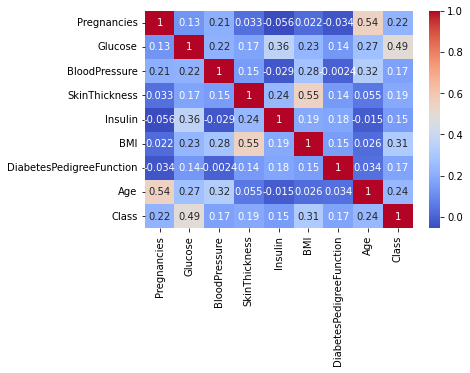

In [18]:
# Построим матрицу корреляции между признаками на обработаных данных:

# Весь набор данных
#plt.figure(figsize=(10,8))
#diabetes.corr()
sns.heatmap(diabetes.corr(),annot=True, cmap="coolwarm");

In [19]:
# Изменение соотношении между атрибутами и target переменной до и после заполнения нулевых значении 

#                   Pregnancies 	Glucose 	BloodPressure 	SkinThickness 	Insulin 	BMI 	DiabetesPedigreeFunction 	Age

# Until fill        0.221898 	   0.466581 	0.065068 	    0.074752 	    0.130548 	0.292695 	0.173844 	        0.238356     Class
# After fill mean   0.221898 	   0.492908 	0.162986 	    0.175026 	    0.179185 	0.312254 	0.173844 	        0.238356     Class
# After fill median 0.221898 	   0.492782 	0.165723 	    0.189065 	    0.148457 	0.312249 	0.173844 	        0.238356     Class

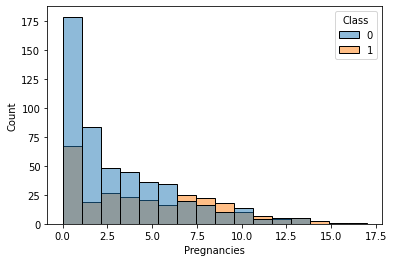

In [20]:
# Построим дополнительно распределение всех атрибутов и их влияние на целевую переменную.
# Атрибут Pregnancies
sns.histplot(x="Pregnancies", hue="Class", data=diabetes);

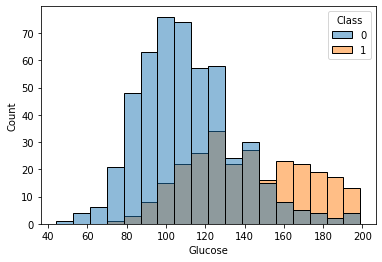

In [21]:
# Атрибут Glucose
sns.histplot(data=diabetes, x='Glucose', hue='Class');

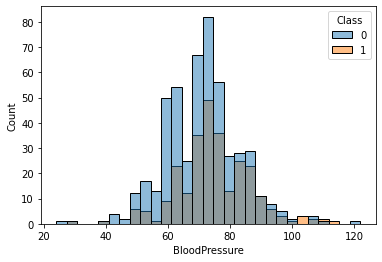

In [22]:
# Атрибут BloodPressure
sns.histplot(data=diabetes, x='BloodPressure', hue='Class');

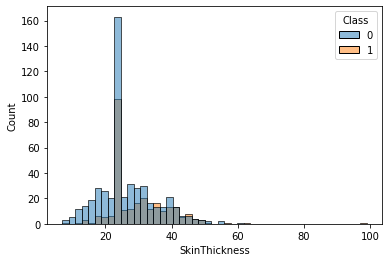

In [23]:
# Атрибут SkinThickness
sns.histplot(x="SkinThickness", hue="Class", data=diabetes);

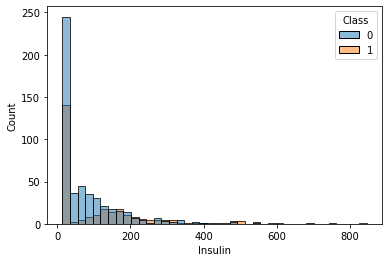

In [24]:
# Атрибут Insulin
sns.histplot(x="Insulin", hue="Class", data=diabetes);

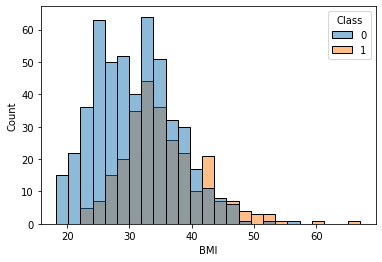

In [25]:
# Атрибут BMI
sns.histplot(x="BMI", hue="Class", data=diabetes);

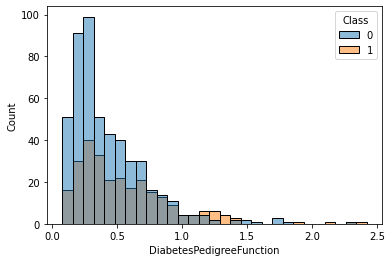

In [26]:
# Атрибут DiabetesPedigreeFunction
sns.histplot(x="DiabetesPedigreeFunction", hue="Class", data=diabetes);

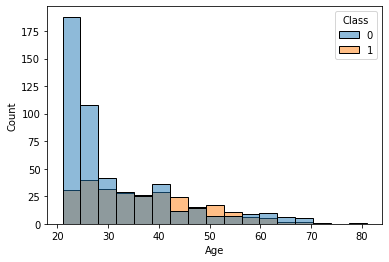

In [27]:
# Атрибут Age
sns.histplot(x="Age", hue="Class", data=diabetes);

Summary of attributes:

* Pregnancies: Диапазон от 0 до 17 и в среднем 4. 
* Glucose/ Глюкоза: от 0/44* до 199 и в среднем 121.
* Blood pressure/ Артериальное давление: От 0/24* до 122, среднее значение  среднее значение - 69/72
* Skin thickness/ Толщина кожи: Диапазон от 0/7* до 99, а среднее значение составляет 21/27. 
* Insulin/ Инсулин: Варьируется от 0/14* до 846. Среднее значение - 80/94.
* BMI/ ИМТ: Диапазон от 0/18* до 67,1, среднее значение - 32.
* Diabetes pedigree function/ Родословная диабета: Диапазон от 0,078 до  2,42, а среднее значение - 0,47. 
* Age: Диапазон от 21 до 81 года, средний возраст - 33 года.

*через черту, после заполнения. Также видно влияние заполнения в виде вертикальных всплесков на графиках.

In [28]:
# inputs / Массив X, содержит признаки для обучения
X = diabetes.drop("Class", axis=1)

# outputs / Массив у с целевой переменной
y = diabetes["Class"]

In [29]:
# Для моделей PCA() необходима стандартизация данных.
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

## Principal component analysis (PCA).

Анализ главных компонент, или РСА, - это метод уменьшения размерности, который используется для уменьшения размерности больших наборов данных путем преобразования большого набора переменных в меньший, который по-прежнему содержит большую часть информации из большого набора.

Сокращение числа переменных в наборе данных, происходит за счет точности. Mеньшие наборы данных легче исследовать и визуализировать, а алгоритмам машинного обучения гораздо проще и быстрее анализировать данные без посторонних переменных.

In [30]:
# Для возможности визуализации создадим модель PCA() с двумя компонентами.
pca = PCA(n_components=2)
pca.fit(scaled_X)

PCA(n_components=2)

In [31]:
# Сохраним результат в X_pca
X_pca = pca.transform(scaled_X)

In [32]:
# Data dimensionality
print(f"Shape: \n{X_pca.shape}")

Shape: 
(768, 2)


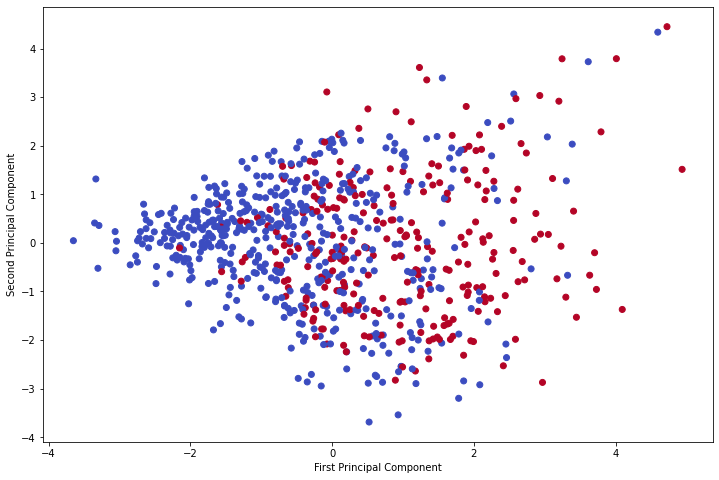

In [33]:
# Визуализация данных при помощи PCA(), с использованием двух компонент.
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component");

In [34]:
# Percentage of variance explained by each of the selected components.
print("Percentage of variance: ", pca.explained_variance_ratio_)
print("Sum: ", np.sum(pca.explained_variance_ratio_))

Percentage of variance:  [0.27429654 0.20541242]
Sum:  0.4797089551174374


In [35]:
df_comp = pd.DataFrame(pca.components_, 
                       index=["PC1", "PC2"], 
                       columns=X.columns)
df_comp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PC1,0.269758,0.427707,0.368430,0.413430,0.284199,0.441899,0.199329,0.349080
PC2,-0.538547,0.028505,-0.248287,0.313117,0.355771,0.291918,0.245292,-0.526791


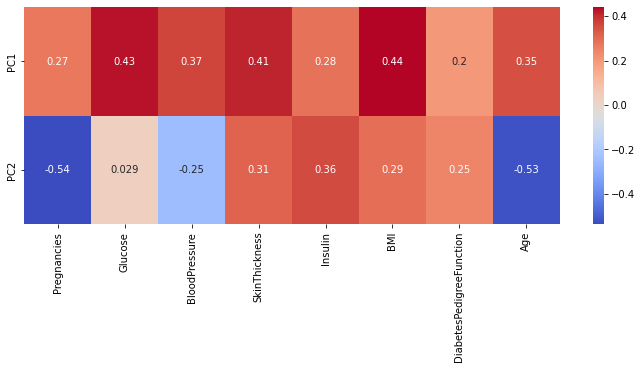

In [36]:
# Влияние атрибутов на каждую PCA компоненту
plt.figure(figsize=(12,4))
sns.heatmap(df_comp, cmap="coolwarm", annot=True);

In [37]:
# Построим модель PCA, где количество компонент равно количеству атрибутов.
pca_base = PCA(n_components=None)
pca_base.fit(scaled_X)
X_pca_base = pca_base.transform(scaled_X)

In [38]:
# Percentage of variance explained by each of the selected components.
print("Percentage of variance: ", pca_base.explained_variance_ratio_)
print("Sum: ", np.sum(pca_base.explained_variance_ratio_))

Percentage of variance:  [0.27429654 0.20541242 0.13699051 0.11091846 0.09803673 0.06885833
 0.05724159 0.04824542]
Sum:  1.0


In [39]:
df_comp2 = pd.DataFrame(pca_base.components_, 
                       index=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"], 
                       columns=X.columns)
df_comp2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PC1,0.269758,0.427707,0.368430,0.413430,0.284199,0.441899,0.199329,0.349080
PC2,-0.538547,0.028505,-0.248287,0.313117,0.355771,0.291918,0.245292,-0.526791
PC3,0.071413,0.420781,-0.337361,-0.358756,0.499243,-0.430601,0.342232,0.153434
PC4,0.142284,-0.355249,-0.099052,0.061228,-0.331496,0.029815,0.847385,0.105612
PC5,-0.458087,0.268113,0.661756,-0.417759,-0.182040,-0.043765,0.241178,-0.112285
PC6,0.096639,-0.625024,0.432287,-0.054109,0.620082,-0.156219,0.027204,-0.023647
PC7,-0.512099,-0.047684,0.032781,0.505738,-0.048966,-0.484324,-0.029984,0.490683
PC8,-0.361145,-0.219504,-0.230482,-0.406642,0.116131,0.521836,-0.071489,0.558572


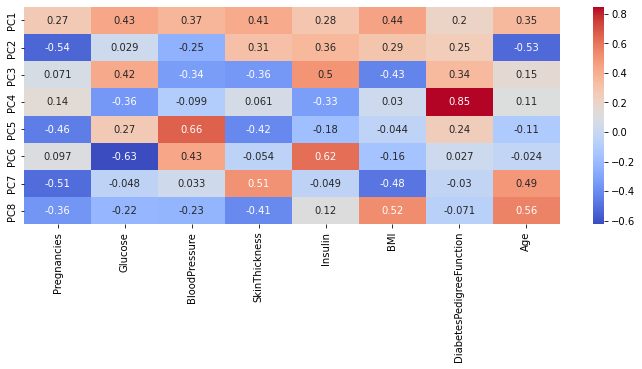

In [40]:
# Влияние атрибутов на каждую PCA компоненту
plt.figure(figsize=(12,4))
sns.heatmap(df_comp2, cmap="coolwarm", annot=True);

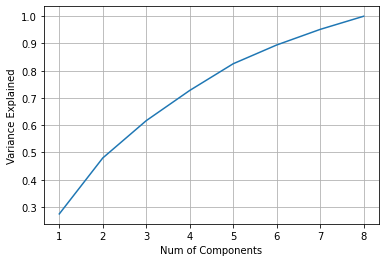

In [41]:
# Построим график изменения variance
explained_variance = []

for n in range(1, 9):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))
    
plt.plot(range(1,9), explained_variance)
plt.grid()
plt.xlabel("Num of Components")
plt.ylabel("Variance Explained");

In [42]:
# Построим PCA с 6-ю компонентами (90%), для дальнейшего использования в моделях.
pca_6 = PCA(n_components=6)
pca_6.fit(scaled_X)
X_pca = pca_6.transform(scaled_X)

# Percentage of variance explained by each of the selected components.
print("Percentage of variance: ", pca_6.explained_variance_ratio_)
print("Sum: ", np.sum(pca_6.explained_variance_ratio_))

Percentage of variance:  [0.27429654 0.20541242 0.13699051 0.11091846 0.09803673 0.06885833]
Sum:  0.894512986977871


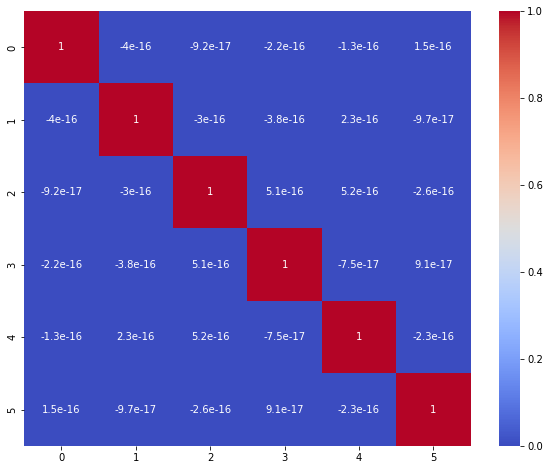

In [43]:
# Построим матрицу корреляции между признаками на обработаных данных:

# Весь набор данных
plt.figure(figsize=(10,8))

sns.heatmap(pd.DataFrame(X_pca).corr(),annot=True, cmap="coolwarm");

Summary:

* На визуализации видно, что при 2-х компонентах (sum variance 0.48 / 48%) класс между собой плохо разделимы.
* Из полученной матрицы корреляции видно при построении модели PCA, теряется корреляция между компонентами.
* Отрезок с наиболее высоким значением вариантивности (90-99%) получается для колиства компонент 6-8, т.е для получения точности исходных данных в 90%, используем 6 компонент.
* Компоненты полученные при помощи метода PCA, можно использовать как обычные атрибуты в дальнейшем при построении моделей.

## Train Test Split

In [44]:
# Разделим данные на тестовые и обучающие, с учетом распределения классов:
test_size=0.25     # Размер тестового набора
random_state=21  

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_pca, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state, 
                                                    shuffle=True, 
                                                    stratify=y)

In [45]:
# Data dimensionality and class distribution on train set
print(f"Shape X_train: \n{X_train.shape}\n")
print(f"Class distribution y_train: \n{y_train.value_counts()}")

Shape X_train: 
(576, 6)

Class distribution y_train: 
0    375
1    201
Name: Class, dtype: int64


In [46]:
# Data dimensionality and class distribution on test set
print(f"Shape X_test: \n{X_test.shape}\n")
print(f"Class distribution y_test: \n{y_test.value_counts()}")

Shape X_test: 
(192, 6)

Class distribution y_test: 
0    125
1     67
Name: Class, dtype: int64


In [47]:
folds = 10

# Returns K-Folds cross-validator
kf = KFold(n_splits=folds, random_state=random_state, shuffle=True)

# Returns stratified folds
skf = StratifiedKFold(n_splits=folds, random_state=random_state, shuffle=True)

# Building models

## Logistic Regression Model (Base and Grid)

In [48]:
# Build base model LogisticRegression()

# Instantiate a classifier
base_log_model = LogisticRegression()

# Train classifer
base_log_model.fit(X_train,y_train)

# Print Model parameters
print(f"Model parameters: \n{base_log_model.get_params()}", '\n')

Model parameters: 
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 



In [49]:
# Model Performance

# Predict class labels for samples in X
base_log_y_pred = base_log_model.predict(X = X_test)

# Accuracy classification score
print("Accuracy classification score: \n", accuracy_score(y_test, base_log_y_pred), '\n')

# Build classification report
print("Classification report: \n", classification_report(y_test, base_log_y_pred), '\n')

# Build confusion matrix in text mode
print("Confusion matrix (text mode): \n", confusion_matrix(y_test, base_log_y_pred), '\n')

Accuracy classification score: 
 0.7395833333333334 

Classification report: 
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       125
           1       0.70      0.45      0.55        67

    accuracy                           0.74       192
   macro avg       0.72      0.67      0.68       192
weighted avg       0.73      0.74      0.72       192
 

Confusion matrix (text mode): 
 [[112  13]
 [ 37  30]] 



In [50]:
################################################################################################

In [51]:
# Build grid model LogisticRegression()

# Create a list of dictionaries called param_grid and fill out some parameters for C, penalty.

C = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = [{'solver':['lbfgs'],     'C':C, 'penalty':['l2']},
              {'solver':['saga'],      'C':C, 'penalty':['l1', 'l2']},
              {'solver':['liblinear'], 'C':C, 'penalty':['l1', 'l2']}]

# Instantiate a classifier
grid_log_model = GridSearchCV(estimator=LogisticRegression(),
                              param_grid=param_grid,
                              refit=True,
                              verbose=1,
                              cv=skf,
                              scoring='accuracy',
                              n_jobs=-1)
# scoring='accuracy' -> Strategy to evaluate the performance of the cross-validated model on the test set.
# n_jobs=-1          -> Number of jobs to run in parallel.

# Train classifer
grid_log_model.fit(X_train,y_train)

# Print Model parameters
print(f"Model parameters: \n{grid_log_model.get_params()}", '\n')

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Model parameters: 
{'cv': StratifiedKFold(n_splits=10, random_state=21, shuffle=True), 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(), 'n_jobs': -1, 'param_grid': [{'solver': ['lbfgs'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}, {'solver': ['saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}, {'solver': ['liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}], 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 

In [52]:
# Model Performance

#Best model
print(f"Best model:  \n{grid_log_model.best_estimator_}")

# Best parameter values
print(f"Best parameter values: \n{grid_log_model.best_params_}")

# Predict class labels for samples in X
grid_log_y_pred = grid_log_model.predict(X = X_test)

# Accuracy classification score
print("Accuracy classification score: \n", accuracy_score(y_test, grid_log_y_pred), '\n')

# Build classification report
print("Classification report: \n", classification_report(y_test, grid_log_y_pred), '\n')

# Build confusion matrix in text mode
print("Confusion matrix (text mode): \n", confusion_matrix(y_test, grid_log_y_pred), '\n')

Best model:  
LogisticRegression(C=0.1)
Best parameter values: 
{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy classification score: 
 0.734375 

Classification report: 
               precision    recall  f1-score   support

           0       0.75      0.90      0.81       125
           1       0.69      0.43      0.53        67

    accuracy                           0.73       192
   macro avg       0.72      0.66      0.67       192
weighted avg       0.73      0.73      0.72       192
 

Confusion matrix (text mode): 
 [[112  13]
 [ 38  29]] 



## Decision Tree Classifier Model (Base and Grid)

In [53]:
# Build base model DecisionTreeClassifier()

# Instantiate a classifier
base_dt_model = DecisionTreeClassifier()

# Для DT используем исходные данные без стандартизации, так как алгоритм DT не базируется не метриках расстояния
base_dt_model.fit(X_train,y_train)

# Print Model parameters
print(f"Model parameters: \n{base_dt_model.get_params()}", '\n')

Model parameters: 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'} 



In [54]:
# Model Performance

# Predict class labels for samples in X
base_dt_y_pred = base_dt_model.predict(X = X_test)

# Accuracy classification score
print("Accuracy classification score: \n", accuracy_score(y_test, base_dt_y_pred), '\n')

# Build classification report
print("Classification report: \n", classification_report(y_test, base_dt_y_pred), '\n')

# Build confusion matrix in text mode
print("Confusion matrix (text mode): \n", confusion_matrix(y_test, base_dt_y_pred), '\n')

Accuracy classification score: 
 0.6614583333333334 

Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.76      0.75       125
           1       0.52      0.48      0.50        67

    accuracy                           0.66       192
   macro avg       0.62      0.62      0.62       192
weighted avg       0.66      0.66      0.66       192
 

Confusion matrix (text mode): 
 [[95 30]
 [35 32]] 



In [55]:
################################################################################################

In [56]:
# Build grid model DecisionTreeClassifier()

# Create a list of dictionaries called param_grid and fill out some parameters

param_grid = {"criterion": ["gini", "entropy"],
               "splitter": ["best", "random"],
               "max_depth": np.arange(1,10),
               "max_leaf_nodes": np.arange(2,10)}

# Instantiate a classifier
grid_dt_model = GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid=param_grid,
                              refit=True,
                              verbose=1,
                              cv=skf,
                              scoring='accuracy',
                              n_jobs=-1)
# scoring='accuracy' -> Strategy to evaluate the performance of the cross-validated model on the test set.
# n_jobs=-1          -> Number of jobs to run in parallel.

# Train classifer
grid_dt_model.fit(X_train,y_train)

# Print Model parameters
print(f"Model parameters: \n{grid_dt_model.get_params()}", '\n')

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Model parameters: 
{'cv': StratifiedKFold(n_splits=10, random_state=21, shuffle=True), 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(), 'n_jobs': -1, 'param_grid': {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': 'accuracy', 'verbose': 1} 



Best model:  
DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=9,
                       splitter='random')
Best parameter values: 
{'criterion': 'entropy', 'max_depth': 9, 'max_leaf_nodes': 9, 'splitter': 'random'}
Accuracy classification score: 
 0.765625 

Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.91      0.84       125
           1       0.75      0.49      0.59        67

    accuracy                           0.77       192
   macro avg       0.76      0.70      0.71       192
weighted avg       0.76      0.77      0.75       192
 

Confusion matrix (text mode): 
 [[114  11]
 [ 34  33]] 



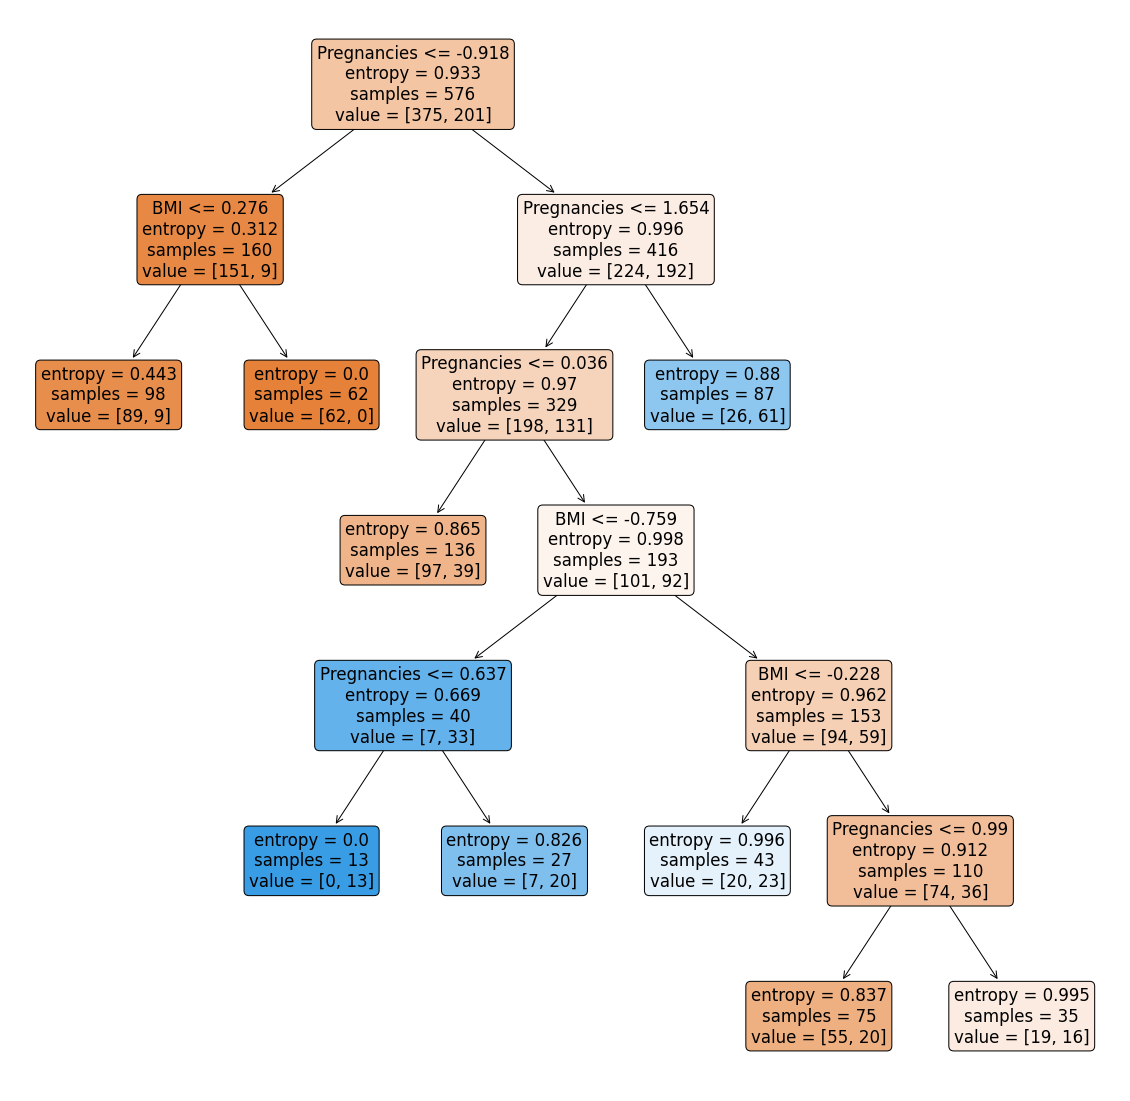

In [57]:
# Model Performance

#Best model
print(f"Best model:  \n{grid_dt_model.best_estimator_}")

# Best parameter values
print(f"Best parameter values: \n{grid_dt_model.best_params_}")

# Predict class labels for samples in X
grid_dt_y_pred = grid_dt_model.predict(X = X_test)

# Accuracy classification score
print("Accuracy classification score: \n", accuracy_score(y_test, grid_dt_y_pred), '\n')

# Build classification report
print("Classification report: \n", classification_report(y_test, grid_dt_y_pred), '\n')

# Build confusion matrix in text mode
print("Confusion matrix (text mode): \n", confusion_matrix(y_test, grid_dt_y_pred), '\n')

# Plot a decision tree.
plt.figure(figsize=(20,20))
plot_tree(grid_dt_model.best_estimator_, feature_names=X.columns, filled=True, rounded=True);

## Random Forest Classifier Model

In [58]:
# Build base model RandomForestClassifier()

# Instantiate a classifier
base_rf_model = RandomForestClassifier()

# Для DT используем исходные данные без стандартизации, так как алгоритм DT не базируется не метриках расстояния
base_rf_model.fit(X_train,y_train)

# Print Model parameters
print(f"Model parameters: \n{base_rf_model.get_params()}", '\n')

Model parameters: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 



In [59]:
# Model Performance

# Predict class labels for samples in X
base_rf_y_pred = base_rf_model.predict(X = X_test)

# Accuracy classification score
print("Accuracy classification score: \n", accuracy_score(y_test, base_rf_y_pred), '\n')

# Build classification report
print("Classification report: \n", classification_report(y_test, base_rf_y_pred), '\n')

# Build confusion matrix in text mode
print("Confusion matrix (text mode): \n", confusion_matrix(y_test, base_rf_y_pred), '\n')

Accuracy classification score: 
 0.6979166666666666 

Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.86      0.79       125
           1       0.60      0.39      0.47        67

    accuracy                           0.70       192
   macro avg       0.66      0.63      0.63       192
weighted avg       0.68      0.70      0.68       192
 

Confusion matrix (text mode): 
 [[108  17]
 [ 41  26]] 



## AdaBoost Classifier Model

In [60]:
# Build base model AdaBoostClassifier()

# Instantiate a classifier
base_ada_model = AdaBoostClassifier()

# Для DT используем исходные данные без стандартизации, так как алгоритм DT не базируется не метриках расстояния
base_ada_model.fit(X_train,y_train)

# Print Model parameters
print(f"Model parameters: \n{base_ada_model.get_params()}", '\n')

Model parameters: 
{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None} 



In [61]:
# Model Performance

# Predict class labels for samples in X
base_ada_y_pred = base_ada_model.predict(X = X_test)

# Accuracy classification score
print("Accuracy classification score: \n", accuracy_score(y_test, base_ada_y_pred), '\n')

# Build classification report
print("Classification report: \n", classification_report(y_test, base_ada_y_pred), '\n')

# Build confusion matrix in text mode
print("Confusion matrix (text mode): \n", confusion_matrix(y_test, base_ada_y_pred), '\n')

Accuracy classification score: 
 0.7395833333333334 

Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.88      0.81       125
           1       0.68      0.48      0.56        67

    accuracy                           0.74       192
   macro avg       0.72      0.68      0.69       192
weighted avg       0.73      0.74      0.73       192
 

Confusion matrix (text mode): 
 [[110  15]
 [ 35  32]] 



# Summary:



Glucose является наиболее важным фактором в определении начала диабета, за которым следуют BMI/Age/Diabetes Pedigree Function (на разных моделях).
Другие факторы, такие как Pregnancies, Blood Pressure, Skin Thickness и Insulin, также вносят свой вклад в прогноз.

В данной работе на были использованы 6 моделей (base and grid logistic regression, base and grid decision trees, random forest, Ada boost) с акцентом на decision trees, машинного обучения на наборе данных о болезни диабетом индейцев племени Pima. Также были использованы разные методы заполнения некорректных данных. 
Для визуализации decision trees использовалась функция plot_tree(estimator_name) из sklearn.tree.


Был использован один из методов уменьшения размерности данных - principal component analysis, (PCA). В данной работе при помощи данного метода удалось понизить размерность  с 8 до 6, практически не потеряв в точности.


Результаты оценок моделей, и наилучшие параметры grid model приведены ниже.

In [62]:
# Для LogisticRegression регрессий:
print(f"Best parameter values: \n{grid_log_model.best_params_}")

Best parameter values: 
{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [63]:
# Для DecisionTreeClassifier:
print(f"Best parameter values: \n{grid_dt_model.best_params_}")

Best parameter values: 
{'criterion': 'entropy', 'max_depth': 9, 'max_leaf_nodes': 9, 'splitter': 'random'}


In [64]:
# Результаты accuracy для построенных моделей (с использованием PCA):

print(f"Accuracy Base Log Model (with PCA): \n{accuracy_score(y_test, base_log_y_pred):.4f}")
print(f"Accuracy Grid Log Model (with PCA): \n{accuracy_score(y_test, grid_log_y_pred):.4f}")
print(f"Accuracy Base DT Model  (with PCA): \n{accuracy_score(y_test, base_dt_y_pred):.4f}")
print(f"Accuracy Grid DT Model  (with PCA): \n{accuracy_score(y_test, grid_dt_y_pred):.4f}")
print(f"Accuracy Base RF Model  (with PCA): \n{accuracy_score(y_test, base_rf_y_pred):.4f}")
print(f"Accuracy Grid Ada Model (with PCA): \n{accuracy_score(y_test, base_ada_y_pred):.4f}")

Accuracy Base Log Model (with PCA): 
0.7396
Accuracy Grid Log Model (with PCA): 
0.7344
Accuracy Base DT Model  (with PCA): 
0.6615
Accuracy Grid DT Model  (with PCA): 
0.7656
Accuracy Base RF Model  (with PCA): 
0.6979
Accuracy Grid Ada Model (with PCA): 
0.7396


In [65]:
################################################################################################